# Graph clustering by Louvain

This notebook illustrates the clustering of a graph by the [Louvain algorithm](https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering).

In [1]:
import numpy as np

In [2]:
import sknetwork as skn

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.toy_graphs.karate_club()
adjacency

<34x34 sparse matrix of type '<class 'numpy.int64'>'
	with 156 stored elements in Compressed Sparse Row format>

**Clustering**

In [4]:
louvain = skn.clustering.Louvain(engine = 'python')
louvain.fit(adjacency)

In [5]:
labels = louvain.labels_
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 2 1 1 2 1 1]


In [6]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [12 11  6  5]


**Visualization**

In [7]:
from networkx import from_scipy_sparse_matrix, draw

In [8]:
graph = from_scipy_sparse_matrix(adjacency)

In [9]:
colors = ['r','g','b','c','m','y']

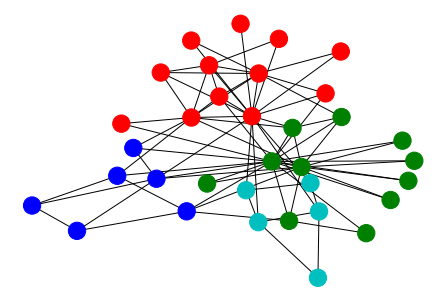

In [11]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph])

**Metrics**

In [12]:
modularity = skn.clustering.modularity(adjacency,labels)

In [13]:
np.round(modularity,2)

0.42

## Directed graphs

**Loading**

In [14]:
adjacency, names = skn.toy_graphs.painters(return_labels=True)
adjacency

<14x14 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

**Clustering**

In [15]:
louvain = skn.clustering.Louvain(engine = 'python')
louvain.fit(adjacency)

In [16]:
labels = louvain.labels_
print(labels)

[2 0 1 0 1 1 3 0 2 1 2 0 0 3]


In [17]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2 3] [5 4 3 2]


**Visualization**

In [18]:
from networkx import from_scipy_sparse_matrix, draw, DiGraph

In [19]:
graph = from_scipy_sparse_matrix(adjacency,create_using=DiGraph())

In [20]:
colors = ['r','g','b','c','m','y']

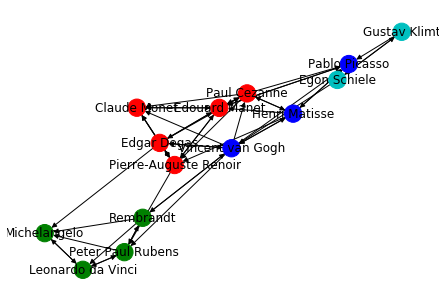

In [22]:
# Warning: If the image does not appear, run the cell again.
draw(graph, node_color=[colors[labels[i]] for i in graph],labels = names)

**Metrics**

In [23]:
modularity = skn.clustering.modularity(adjacency,labels)

In [24]:
np.round(modularity,2)

0.32

## Bipartite graphs

**Loading**

In [26]:
biadjacency, movies, actors = skn.toy_graphs.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Clustering**

In [28]:
bilouvain = skn.clustering.BiLouvain('python')
bilouvain.fit(biadjacency)

In [29]:
labels = bilouvain.labels_
feature_labels = bilouvain.feature_labels_
print(labels, feature_labels)

[3 3 1 4 4 1 1 1 0 2 0 0 0 2 2] [2 3 3 1 1 0 4 1 1 0 0 2 2 0 2 0]


In [30]:
unique_labels, counts = np.unique(labels, return_counts = True)
_,feature_counts = np.unique(feature_labels, return_counts = True)
print(unique_labels, counts, feature_counts)

[0 1 2 3 4] [4 4 3 2 2] [5 4 4 2 1]


In [31]:
# Graph as undirected (ignoring the bipartite structure)
bilouvain.fit(biadjacency, force_undirected=True)

In [32]:
labels2 = bilouvain.labels_
feature_labels2 = bilouvain.feature_labels_
print(labels2, feature_labels2)

[1 1 0 0 1 0 0 0 3 2 3 0 3 2 2] [1 1 1 0 0 0 1 0 0 3 3 2 2 0 2 3]


In [33]:
unique_labels2, counts2 = np.unique(labels2, return_counts = True)
_,feature_counts2 = np.unique(feature_labels2, return_counts = True)
print(unique_labels2, counts2, feature_counts2)

[0 1 2 3] [6 3 3 3] [6 4 3 3]


**Visualization**

In [34]:
from networkx import from_scipy_sparse_matrix, draw, draw_networkx_labels

In [35]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [36]:
graph = from_scipy_sparse_matrix(adjacency)

In [37]:
colors = ['r','g','b','c','m','y']

In [38]:
n,p = biadjacency.shape
pos = {i: (0,i) for i in range(n)} 
pos.update({n + i: (2,i) for i in range(p)})

In [39]:
pos_labels = {i: (0.5,i) for i in range(n)} 
pos_labels.update({n + i: (1.5,i) for i in range(p)})

In [40]:
names = movies
names.update({n + i: actors[i] for i in actors})

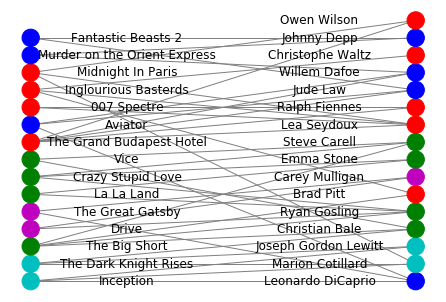

In [42]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=[colors[np.append(labels, feature_labels)[i]] for i in graph], edge_color = 'grey')
show_labels = draw_networkx_labels(graph, pos_labels, labels = names)

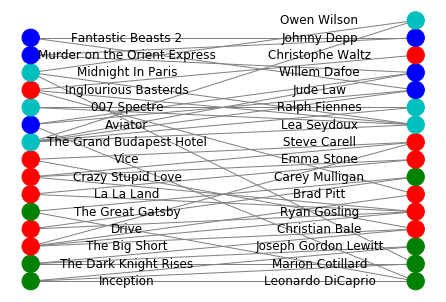

In [43]:
# Warning: If the image does not appear, run the cell again.
draw(graph, pos, node_color=[colors[np.append(labels2, feature_labels2)[i]] for i in graph], edge_color = 'grey')
show_labels = draw_networkx_labels(graph, pos_labels, labels = names)

**Metrics**

In [44]:
bimodularity = skn.clustering.bimodularity(biadjacency,labels,feature_labels)

In [45]:
np.round(bimodularity,3)

0.573

In [46]:
bimodularity = skn.clustering.bimodularity(biadjacency,labels2,feature_labels2)

In [47]:
np.round(bimodularity,3)

0.558

In [48]:
modularity = skn.clustering.modularity(adjacency,np.append(labels, feature_labels))

In [49]:
np.round(modularity,3)

0.569

In [50]:
modularity = skn.clustering.modularity(adjacency,np.append(labels2, feature_labels2))

In [51]:
np.round(modularity,3)

0.557